# Introdução a DeepLearnig e classificação de imagens

> Este notebook foi desenvolvido durante o curso de MachineLearnig - Part. 1 oferecido pela Alura;

> Nele temos os primeiros passos para classificação de imagens com Redes Neurais;

> Foi usado o dataSet disponibilizado pelo keras chamado Fashion MNIST que contem 70.000 imagens de diferentes roupas, com uma resolução de 28x28 pixels e suas respectivas classificações de forma a ser possível fazer o treinamento do modelo.

### Importações

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Carregando o DataSet

In [2]:
dataset = keras.datasets.fashion_mnist
((x_treino, y_treino), (x_teste, y_teste)) = dataset.load_data()
print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Visualizando os dados do dataSet

> Esta primeira visualização mostra um grid com vários tipos de imagens disponíveis no dataSet

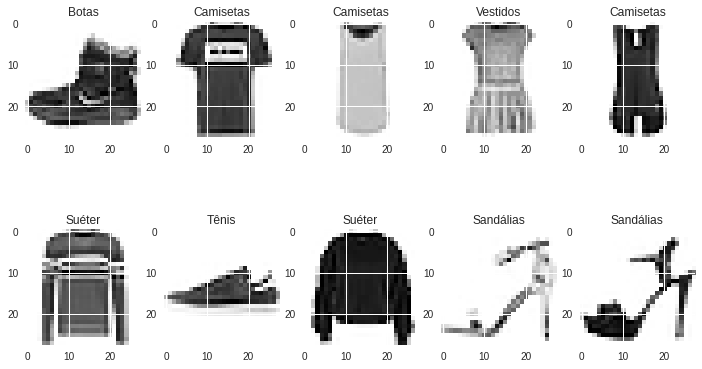

In [3]:
#Nomes das categorias do dataSet segundo o site oficial
nomes_imagens = {0: 'Camisetas',1: 'Calça',2: 'Suéter',3: 'Vestidos',
4: 'Casaco',5: 'Sandálias',6: 'Camisas',7: 'Tênis',8: 'Bolsa',9: 'Botas'}

plt.style.use('seaborn')
plt.figure(figsize=(12,7))
for imagem in range(10):
    plt.subplot(2,5, imagem+1)
    plt.imshow(x_treino[imagem])
    plt.title(nomes_imagens[y_treino[imagem]])

> Esta segunda visualização mostra o tamanho da imagem e a escala de cor de cada imagem

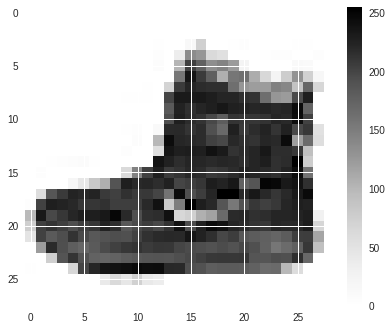

In [4]:
plt.imshow(x_treino[0])
plt.colorbar()

### Normalização dos dados

In [5]:
#normalização
x_treino = x_treino/255.0

> Criando modelo com três camadas, compilando e treinando o modelo usando 20% dos dados para validação e 5 épocas de treino

In [6]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5298 - accuracy: 0.8115 - val_loss: 0.4216 - val_accuracy: 0.8453
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3986 - accuracy: 0.8542 - val_loss: 0.3737 - val_accuracy: 0.8619
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3646 - accuracy: 0.8660 - val_loss: 0.3508 - val_accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3415 - accuracy: 0.8732 - val_loss: 0.3473 - val_accuracy: 0.8736
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3258 - accuracy: 0.8785 - val_loss: 0.3350 - val_accuracy: 0.8806


### Salvando e importando o modelo

In [7]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

### Visualizando a evolução da acurácia (gráfico da esquerda) e da perda (gráfico da direita) por época

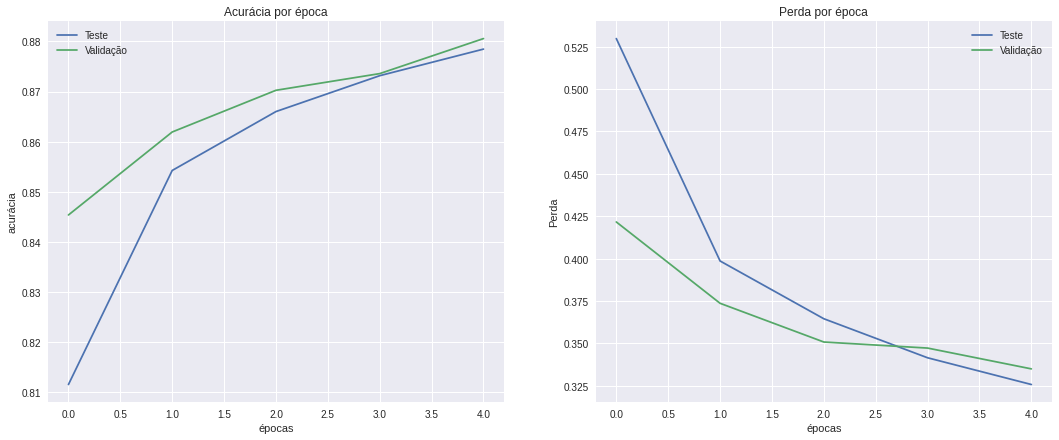

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,7))

#gráfico 1 - Evolução da acurácia
plt.style.use('seaborn')
ax1.plot(historico.history['accuracy'])
ax1.plot(historico.history['val_accuracy'])
ax1.set_title('Acurácia por época')
ax1.set_xlabel('épocas')
ax1.set_ylabel('acurácia')
ax1.legend(['Teste', 'Validação'])

#gráfico 2 - Evolução da perda
ax2.plot(historico.history['loss'])
ax2.plot(historico.history['val_loss'])
ax2.set_title('Perda por época')
ax2.set_xlabel('épocas')
ax2.set_ylabel('Perda')
ax2.legend(['Teste', 'Validação'])

plt.show()

### Predição do modelo para os dados de teste e teste do carregamento do modelo

In [9]:
teste = modelo.predict(x_teste)
index = 9
print('Valor da predição: ', np.argmax(teste[index]))
print('Valor correto: ', y_teste[index])

teste_modelo_salvo = modelo_salvo.predict(x_teste)
index = 9
print('Valor da predição: ', np.argmax(teste_modelo_salvo[index]))
print('Valor correto: ', y_teste[index])

Valor da predição:  7
Valor correto:  7
Valor da predição:  7
Valor correto:  7


### Verificando a avaliação do modelo

In [11]:
loss, accuracy = modelo.evaluate(x_teste, y_teste)
print('A perda do teste foi:', loss)
print('A acurácia do teste foi:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 59.3111 - accuracy: 0.8542
A perda do teste foi: 59.311119079589844
A acurácia do teste foi: 0.854200005531311
